# Выборка и агрегация данных в MongoDB

###Цель домашней работы

Закрепить на практике основные приемы работы с СУБД MongoDB, включая выборку, сортировку, объединение, агрегацию данных и передачу результатов выборки в программу на Python в целях аналитики и дальнейшей обработки.

### Условия выполнения задания

В этом задании вам предстоит выполнить несколько запросов к базе данных для получения выборок по условиям, а также воспользоваться фреймворком агрегации MongoDB для построения конвейера обработки данных.

**Максимальное количество баллов за выполнение домашней работы:** 10.

##Как выполнять задание

В работе над заданием нужно использовать следующие инструменты:

* **MongoDB:**

1. Зарегистрируйтесь в сервисе MongoDB Atlas: https://www.mongodb.com/atlas/database.
1. Создайте кластер уровня M0 — это бесплатно.
1. Добавьте в кластер тестовую базу данных `sample_mflix`, используя опцию Load Sample Dataset.

В качестве альтернативы вы можете установить MongoDB на свой локальный компьютер и импортировать необходимые датасеты в свою СУБД, загрузив их по ссылке: https://github.com/neelabalan/mongodb-sample-dataset/tree/main/sample_mflix. Для этого подключитесь к своему серверу через Compass, создайте новую БД, создайте для каждого датасета коллекцию и щелкните Add data → Import JSON or CSV file.

* **MongoDB Compass** — графический интерфейс для работы с MongoDB, который можно использовать как вспомогательный инструмент при создании запросов и построении агрегаций.

* **Python и библиотека PyMongo.** Работайте в Jupyter Notebook или Google Colaboratory. Рекомендуется использовать версию Python 3.12.

##Формат сдачи

Результаты работы необходимо оформить в виде ноутбука Jupyter. Можно загрузить файл в LMS либо поделиться ссылкой на Google Colaboratory.

##Место, где нужно выполнить задание



In [1]:
#Начать выполнение задания тут

In [ ]:
#!pip install pymongo

import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
load_dotenv()

mongo_uri = os.getenv("MONGO_URI")
client = pymongo.MongoClient(mongo_uri)

print(client.list_database_names())  # Вывести список БД для проверки подключения

['sample_airbnb', 'sample_mflix', 'admin', 'local']


### Упражнение 1. Запросы на выборку

Цель этого упражнения — закрепить навык выполнения запросов на выборку. Все запросы выполняются на базе `sample_mflix` с данными о кинофильмах.

#### Задача 1.1 (1 балл)

Выведите из коллекции `theaters` документы о кинотеатрах в городе Florence, штат KY.

**Для справки:**

* Обратите внимание, что информация об адресе кинотеатров хранится во вложенных документах. Для доступа к полям вложенных документов следует использовать точку: `родительский_документ.вложенный_документ.поле`.
* В случае затруднений с написанием логического условия обращайтесь к сопоставлению синтаксиса SQL и Mongo: https://www.mongodb.com/docs/manual/reference/sql-comparison/.
* Если вы предпочитаете сперва выполнять запросы в Compass, из этого приложения можно выгружать код готового запроса на Python (кнопка с символом `</>`).

In [5]:
# Ваш код здесь
db = client["sample_mflix"]
collection = db["theaters"]

query = {
    "location.address.city": "Florence",
    "location.address.state": "KY"
}

results = list(collection.find(query))

for r in results:
    print(r)

{'_id': ObjectId('59a47287cfa9a3a73e51e893'), 'theaterId': 161, 'location': {'address': {'street1': '100 Meijer Dr.', 'city': 'Florence', 'state': 'KY', 'zipcode': '41042'}, 'geo': {'type': 'Point', 'coordinates': [-84.636383, 39.014843]}}}
{'_id': ObjectId('59a47287cfa9a3a73e51ea02'), 'theaterId': 2823, 'location': {'address': {'street1': '2823 Florence Mall', 'street2': '#2148', 'city': 'Florence', 'state': 'KY', 'zipcode': '41042'}, 'geo': {'type': 'Point', 'coordinates': [-84.6499595, 38.9967246]}}}


#### Задача 1.2 (1 балл)

Сделайте запрос к коллекции `comments` и выведите один комментарий (значение поля `text`) пользователя по имени Doreah.

In [6]:
# Ваш код здесь
collection = db["comments"]

query = {"name": "Doreah"}
projection = {"_id": 0, "text": 1}

result = collection.find_one(query, projection)

print(result)

{'text': 'Porro explicabo cumque vitae sint quia quis. Consequuntur voluptatibus optio maxime ratione temporibus incidunt minus architecto.'}


#### Задача 1.3 (1 балл)

Сделайте запрос к коллекции `movies` и выведите количество документов, в которых в качестве первого жанра фильма (поле `genres`) указано значение Horror.

**Для справки:**

1. Обратите внимание, что поле `genres` представляет собой массив (индексация массивов начинается с нуля).
1. При работе в MongoDB Shell для подсчета количества документов в курсоре можно использовать метод `count()`, однако он был удален в последних версиях библиотеки PyMongo. В случае затруднений с использованием функций Mongo можно использовать для подсчета документов средства Python.

In [7]:
# Ваш код здесь
collection = db["movies"]
query = {"genres.0": "Horror"}
count = collection.count_documents(query)

print(count)


700


#### Задача 1.4 (2 балла)

Выведите из коллекции `movies` документы о фильмах, которые в качестве первого жанра определены как Film-Noir либо Horror и были выпущены в период с 1940 по 1949 г. (включительно).

In [8]:
# Ваш код здесь
collection = db["movies"]

query = {
    "genres.0": {"$in": ["Film-Noir", "Horror"]},
    "year": {"$gte": 1940, "$lte": 1949}
}

results = list(collection.find(query))

for r in results:
    print(r)

{'_id': ObjectId('573a1393f29313caabcdc814'), 'plot': "An American man marries a Serbian immigrant who fears that she will turn into the cat person of her homeland's fables if they are intimate together.", 'genres': ['Horror', 'Thriller'], 'runtime': 73, 'rated': 'APPROVED', 'cast': ['Simone Simon', 'Kent Smith', 'Tom Conway', 'Jane Randolph'], 'poster': 'https://m.media-amazon.com/images/M/MV5BNzI4YWY0NWQtNWI5YS00MGE4LWE4YTgtMzBmOWIwMzdiYTRiL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_SY1000_SX677_AL_.jpg', 'title': 'Cat People', 'fullplot': 'Irena Dubrovna, a beautiful and mysterious Serbian-born fashion artist living in New York City, falls in love with and marries average-Joe American Oliver Reed. Their marriage suffers though, as Irena believes that she suffers from an ancient curse- whenever emotionally aroused, she will turn into a panther and kill. Oliver thinks that is absurd and childish, so he sends her to psychiatrist Dr. Judd to cure her. Easier said than done...', 'la

#### Задача 1.5 (1 балл)

Модифицируйте запрос из задачи 1.4 таким образом, чтобы осуществить **проекцию**: результатом выборки должен стать список словарей, каждый из которых содержит только два поля: `title` и `year`.

Для справки о проекции смотрите документацию по методу `find()` в PyMongo:
https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find

In [9]:
# Ваш код здесь
collection = db["movies"]
query = {
    "genres.0": {"$in": ["Film-Noir", "Horror"]},
    "year": {"$gte": 1940, "$lte": 1949}
}
projection = {
    "_id": 0,
    "title": 1,
    "year": 1
}
results = list(collection.find(query, projection))
for r in results:
    print(r)

{'title': 'Cat People', 'year': 1942}
{'title': 'I Walked with a Zombie', 'year': 1943}
{'title': 'The Leopard Man', 'year': 1943}
{'title': 'The Body Snatcher', 'year': 1945}
{'title': 'Dead of Night', 'year': 1945}
{'title': 'The Chase', 'year': 1946}
{'title': 'The Set-Up', 'year': 1949}


### Упражнение 2. Агрегация с помощью конвейеров

#### Задача 2.1 (3 балла)

В этой задаче вам требуется определить, какие фильмы получили наибольшее количество комментариев. Составьте для этого конвейер агрегации с перечисленными ниже этапами. Для удобства рекомендуется воспользоваться приложением Compass.

**Этапы выполнения задания:**

1. Сгруппировать документы коллекции `comments` по полю `movie_id` и подсчитать количество комментариев для каждого фильма, записав его в поле `count`.
1. Отсортировать получившийся набор данных по убыванию количества комментариев (так, чтобы первый документ в этом наборе указывал на фильм с наибольшим количеством комментариев).
1. Используя оператор `$lookup`, присоединить коллекцию `movies` (по полю `movie_id`).
1. Выполнить проекцию, оставив в наборе данных только три поля: название фильма (`title`), год выпуска (`year`) и количество комментариев (поле `count`, добавленное на первом этапе). Для этого воспользуйтесь оператором `$project`: https://www.mongodb.com/docs/manual/reference/operator/aggregation/project/. Обратите внимание, что данные из коллекции `movies` (`title` и `year`) на этом этапе окажутся внутри массива.
1. Применить оператор `$unwind`, чтобы деконструировать этот массив (подробнее на https://www.mongodb.com/docs/manual/reference/operator/aggregation/unwind/). В результате массив должен превратиться в одиночный объект.
1. Применить оператор `$addFields`, чтобы добавить поля `title` и `year` на верхний уровень структуры документа (https://www.mongodb.com/docs/manual/reference/operator/aggregation/addFields/).
1. Выполнить проекцию еще раз, чтобы удалить поле с массивом.

Ваш алгоритм решения может отличаться от приведенного здесь. Главное — достичь цели: **получить плоский набор данных с тремя полями** (`count` — количество комментариев, `year` — год выпуска, `title` — название фильма).

Скопируйте полученный конвейер в этот документ в виде кода на Python и выведите его на экран в виде списка словарей.

In [10]:
# Ваш код здесь
pipeline = [
    {
        "$group": {
            "_id": "$movie_id",
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {"count": -1}
    },
    {
        "$lookup": {
            "from": "movies",
            "localField": "_id",
            "foreignField": "_id",
            "as": "movie_data"
        }
    },
    {
        "$project": {
            "_id": 1,
            "count": 1,
            "movie_data.title": 1,
            "movie_data.year": 1
        }
    },
    {
        "$unwind": "$movie_data"
    },
    {
        "$addFields": {
            "title": "$movie_data.title",
            "year": "$movie_data.year"
        }
    },
    {
        "$project": {
            "movie_data": 0
        }
    }
]

results = list(db["comments"].aggregate(pipeline))

for r in results:
    print(r)

{'_id': ObjectId('573a13bff29313caabd5e91e'), 'count': 161, 'title': 'The Taking of Pelham 1 2 3', 'year': 2009}
{'_id': ObjectId('573a13abf29313caabd25582'), 'count': 158, 'title': '50 First Dates', 'year': 2004}
{'_id': ObjectId('573a13a3f29313caabd0d1e3'), 'count': 158, 'title': "Ocean's Eleven", 'year': 2001}
{'_id': ObjectId('573a13a5f29313caabd159a9'), 'count': 158, 'title': 'About a Boy', 'year': 2002}
{'_id': ObjectId('573a13b3f29313caabd3b647'), 'count': 158, 'title': 'Terminator Salvation', 'year': 2009}
{'_id': ObjectId('573a139bf29313caabcf3a45'), 'count': 157, 'title': 'The Mummy', 'year': 1999}
{'_id': ObjectId('573a13bcf29313caabd57db6'), 'count': 157, 'title': 'Sherlock Holmes', 'year': 2009}
{'_id': ObjectId('573a13b0f29313caabd3505e'), 'count': 155, 'title': 'Hellboy II: The Golden Army', 'year': 2008}
{'_id': ObjectId('573a13a0f29313caabd05ae1'), 'count': 154, 'title': 'The Mummy Returns', 'year': 2001}
{'_id': ObjectId('573a13acf29313caabd289b3'), 'count': 154, 'tit

#### Задача 2.2 (1 балл)

Используя данные, полученные в задаче 2.1, выведите на экран столбчатую диаграмму, показывающую топ-20 наиболее комментируемых фильмов. По оси ординат выведите названия этих фильмов (подписи разместите слева диаграммы), по оси абсцисс — количество комментариев.

Для решения задачи можно использовать любую библиотеку, например, Seaborn или Matplotlib.

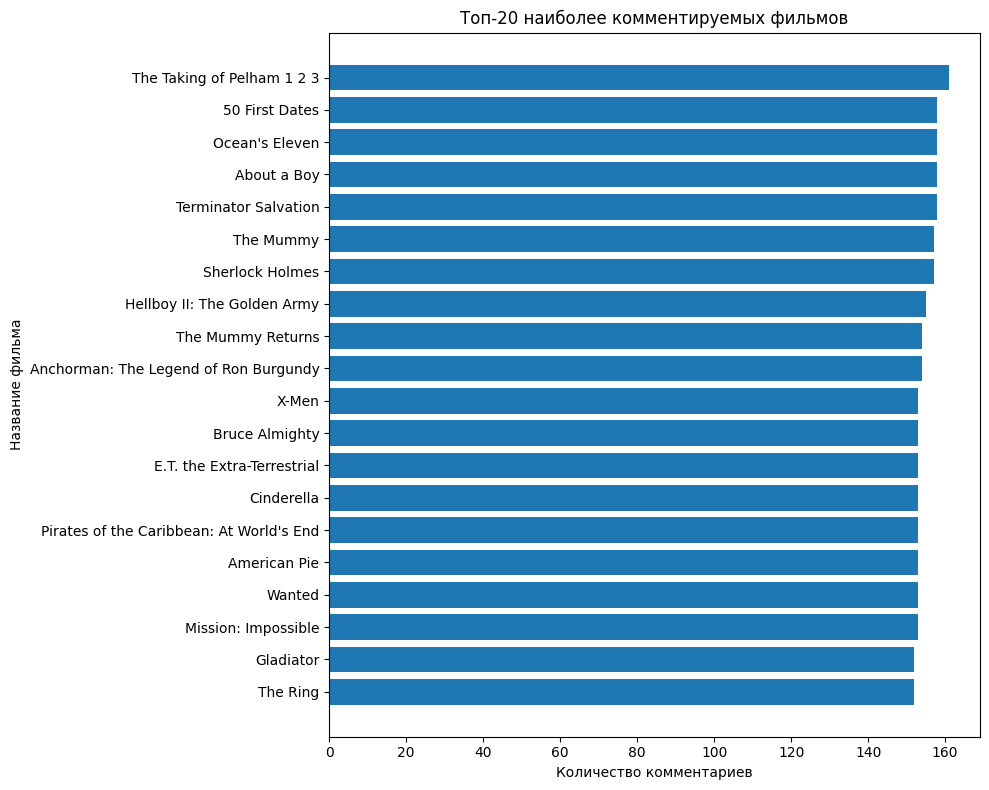

In [11]:
results_sorted = sorted(results, key=lambda x: x["count"], reverse=True)
top20 = results_sorted[:20]
df = pd.DataFrame(top20)

plt.figure(figsize=(10, 8))
plt.barh(df["title"], df["count"])
plt.xlabel("Количество комментариев")
plt.ylabel("Название фильма")
plt.title("Топ-20 наиболее комментируемых фильмов")
plt.gca().invert_yaxis()  # Самый популярный сверху
plt.tight_layout()
plt.show()
